In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from skimage import exposure
from nilearn import plotting
%matplotlib inline


In [2]:
train_img = nib.load('../data/ribfrac-challenge/training/images/RibFrac1-image.nii.gz')
label_img = nib.load('../data/ribfrac-challenge/training/labels/RibFrac1-label.nii.gz')

In [3]:
print("training image shape:", train_img.shape)
print("label image shape:", label_img.shape)

training image shape: (512, 512, 333)
label image shape: (512, 512, 333)


In [4]:
train_img_data = train_img.get_fdata()
label_img_data = label_img.get_fdata()

(array([4181.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4080.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

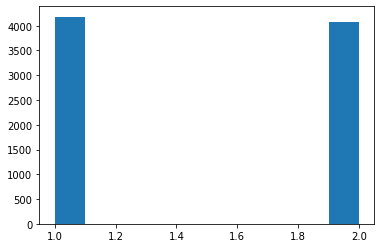

In [5]:
plt.hist(label_img_data[label_img_data != 0].flatten())

In [6]:
def get_nonzero_slices(label_img, train_img):
    label_slices = label_img.swapaxes(2, 0)
    train_slices = train_img.swapaxes(2, 0)
    sums = np.sum(label_slices, axis=(1,2))
    label_slices = label_slices[sums > 0]
    train_slices = train_slices[sums > 0]
    return label_slices, train_slices

In [7]:
label_slices, train_slices = get_nonzero_slices(label_img_data, train_img_data)

In [8]:
# train_slices = exposure.equalize_hist(train_slices)

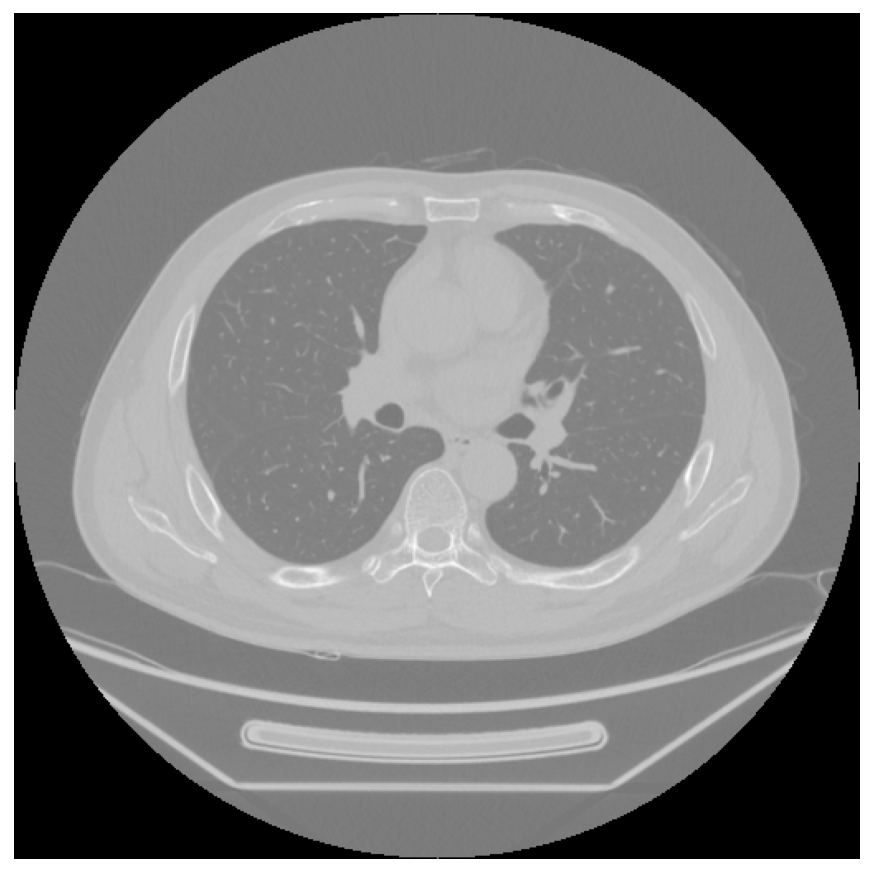

In [9]:
fig, ax = plt.subplots(figsize = (8,8), dpi=140)
ax.imshow(train_slices[0], cmap=plt.cm.gray)
ax.set_axis_off()

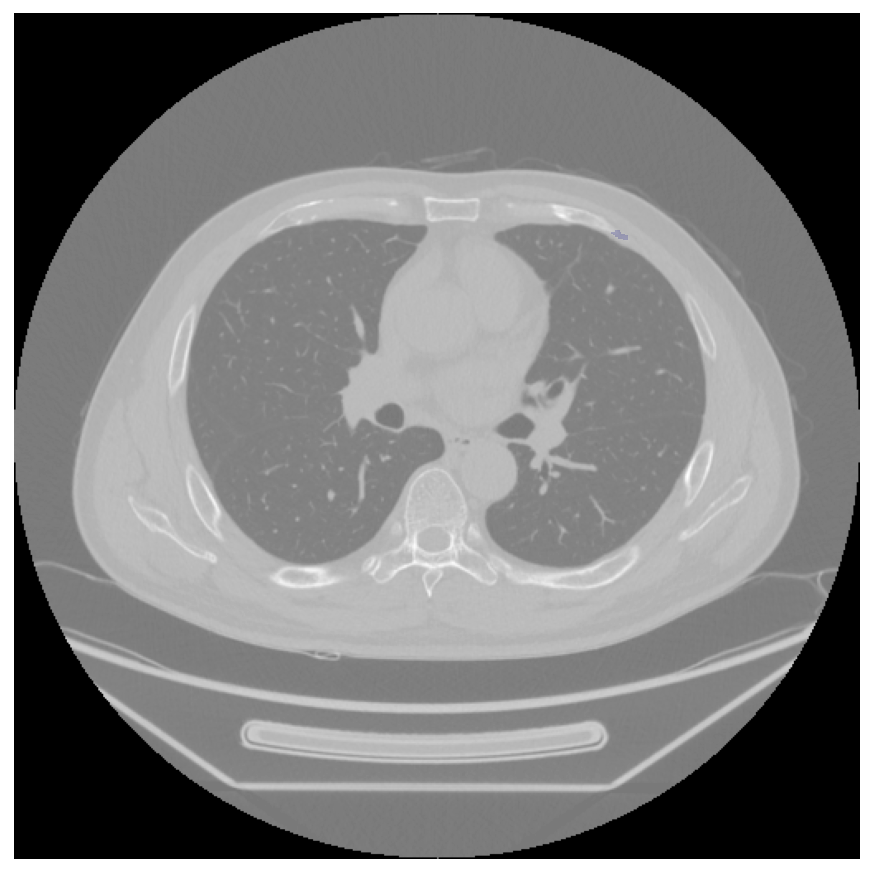

In [10]:
fig, ax = plt.subplots(figsize = (8,8), dpi=140)
ax.imshow(train_slices[0], cmap=plt.cm.gray)
masked = np.ma.masked_where(label_slices[0] == 0, label_slices[0])
ax.imshow(masked, cmap='jet', alpha=0.2) 
ax.set_axis_off()

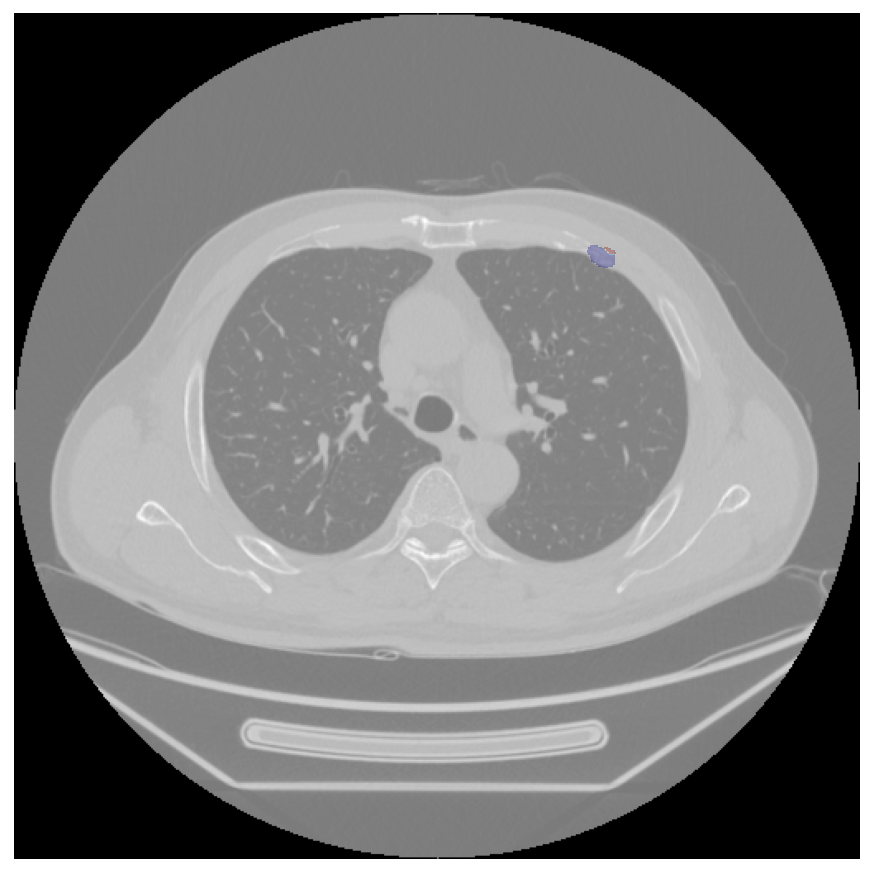

In [11]:
fig, ax = plt.subplots(figsize = (8,8), dpi=140)
ax.imshow(train_slices[20], cmap=plt.cm.gray)

masked = np.ma.masked_where(label_slices[20] == 0, label_slices[10])
ax.imshow(masked, cmap='jet', alpha=0.3) 
ax.set_axis_off()